<a href="https://colab.research.google.com/github/mughala01/Large-Datast-Cleaning-and-Validation-with-Python/blob/main/Learning_Cleaning_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Import Libraries
import pandas as pd # data maniplation and analysis ,loads datasets, handle missing data, filter rows and compute stats
import numpy as np # Numerical Computing , Provides fast array operations, math functions and works behind the scenes with pandas
import matplotlib.pyplot as plt # basic plotting and visualisation
import seaborn as sns #Advanced stats plotting, makes plots prettir and easier for data analysis

#Load Dataset
df=pd.read_csv ("/content/AirQuality.csv", sep=";")
display(df.head())

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
#Checking Dataset
df.shape #This shows the number of rows and colums
df.columns #Column names
df.isna().sum() #missing values
df.duplicated().sum() #checkforduplicates
df.dtypes #check fordata types

,0
Date,object
Time,object
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64




*   Some columns are objects (CO(GT), C6H6(GT), T, RH, AH) → these should probably be numeric.
*  Some are unames? Extras we can drop


* No duplicates :)


*   Missing values might be encoded as -200 instead of NaN → need to replace them.










In [6]:
#Cleaning The Dataset

In [9]:
import pandas as pd
import numpy as np

# Load Dataset
df=pd.read_csv ("/content/AirQuality.csv", sep=";")

# Cleaning The Dataset
df=df.drop(columns= ["Unnamed: 15" , "Unnamed: 16"])
# Columns that should be numeric
cols_to_fix = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

for col in cols_to_fix:
    # Replace commas with periods for decimal conversion
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric, invalid parsing → NaN
    df[col].replace(-200, np.nan, inplace=True)

df.isna().sum()
for col in cols_to_fix:
    df[col].fillna(df[col].median(), inplace=True) #fill in and handle missing values

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df = df.drop(columns=['Date','Time']) #covert date and time to datetime

display(df.head())

/tmp/ipython-input-1998740415.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(-200, np.nan, inplace=True)
/tmp/ipython-input-1998740415.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


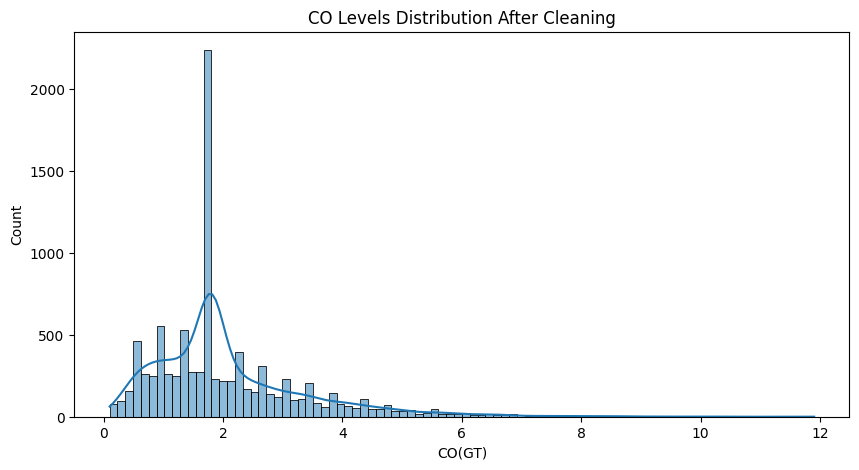

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['CO(GT)'], kde=True)
plt.title("CO Levels Distribution After Cleaning")
plt.show()


Above we have a visualisation of the distribution levels. X-axis: Concentration of Carbon Monoxide (CO) in the air (from the sensor readings).

Y-axis: How many times each value occurred (frequency).

Bars: The histogram bins → e.g., how many hours had CO levels between 1–2, 2–3, etc.

Smooth line (KDE): The estimated probability distribution curve (gives you a “smoothed” version of the histogram).

Why It’s Useful

It shows the distribution of air quality for CO.

If the data is skewed (e.g., many very low or very high values), you can spot it.

You can also see if there are outliers (e.g., extreme CO levels that might be errors).

This is something interviewers LOVE: you’re not just coding, you’re interpreting the data scientifically





This data is now , cleaned up and numeric so ready for analysis
